In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

#using seaaborn to get prettier results
plt.style.use('classic')

In [5]:
#downloading the stock data
ticker = "AAPL"
df = yf.download(ticker,start = "2015-01-01", end ="2024-12-31")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
#initialize Signal column
df["Signal"] = 0


In [7]:
#calculates the averages
df["SMA20"] = df["Close"].rolling(20).mean()
df["SMA50"] = df["Close"].rolling(50).mean()
df["SMA200"] = df["Close"].rolling(200).mean()

In [9]:
#set the signal column
df.loc[(df["SMA20"]> df["SMA50"]) & (df["SMA50"]  > df["SMA200"]),"Signal" ] = 1
df.loc[df["SMA20"]< df["SMA50"],"Signal"] = -1


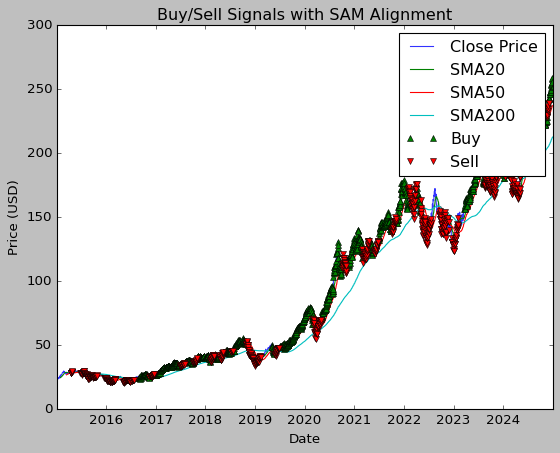

In [10]:
#time for some plots
#price and the moving average
plt.plot(df["Close"], label = "Close Price", alpha = 0.8)
plt.plot(df["SMA20"], label = "SMA20")
plt.plot(df["SMA50"], label = "SMA50")
plt.plot(df["SMA200"], label = "SMA200")
plt.title("Apple Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")

#now putting in the upward arrows
plt.plot(df[df["Signal"] == 1 ]. index, df["Close"][df["Signal"]==1], '^', markersize =6, color = "green", label = "Buy")
plt.plot(df[df["Signal"] == -1].index, df["Close"][df["Signal"] == -1], 'v', markersize=5, color='r', label='Sell')

plt.title("Buy/Sell Signals with SAM Alignment")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [21]:
#stuff
initial_capital = 10000
cash = initial_capital
position = 0
portfolio_values = []

for index, row in df.iterrows():
    # Extract a single scalar value from each row
    price = float(row["Close"])
    signal = int(row["Signal"])

    if signal == 1 and position == 0:
        position = int(cash // price)  # number of shares you can buy
        cash -= position * price
        print("BUY on {}: {} shares at ${:.2f}".format(index.date(), position, price))

    elif signal == -1 and position > 0:
        cash += position * price  # sell all shares
        print("SELL on {}: {} shares at ${:.2f}".format(index.date(), position, price))
        position = 0

    # Calculate total portfolio value (cash + market value of held shares)
    portfolio_value = cash + (position * price)
    portfolio_values.append(portfolio_value)

df["Portfolio"] = portfolio_values


<ipython-input-21-78d843cca1df>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row["Close"])
<ipython-input-21-78d843cca1df>:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  signal = int(row["Signal"])


BUY on 2016-08-30: 410 shares at $24.39
SELL on 2016-11-15: 410 shares at $24.77
BUY on 2016-12-21: 375 shares at $27.07
SELL on 2017-06-27: 375 shares at $33.52
BUY on 2017-08-02: 343 shares at $36.65
SELL on 2017-10-02: 343 shares at $36.01
BUY on 2017-11-01: 316 shares at $39.08
SELL on 2018-02-06: 316 shares at $38.31
BUY on 2018-03-08: 290 shares at $41.75
SELL on 2018-04-13: 290 shares at $41.23
BUY on 2018-05-10: 266 shares at $44.84
SELL on 2018-07-11: 266 shares at $44.50
BUY on 2018-07-24: 259 shares at $45.71
SELL on 2018-10-29: 259 shares at $50.45
BUY on 2019-05-06: 262 shares at $49.94
SELL on 2019-05-24: 262 shares at $43.04
BUY on 2019-07-01: 232 shares at $48.47
SELL on 2020-03-06: 232 shares at $70.14
BUY on 2020-04-30: 228 shares at $71.30
SELL on 2020-10-02: 228 shares at $110.21
BUY on 2020-11-05: 217 shares at $116.07
SELL on 2021-02-26: 217 shares at $118.62
BUY on 2021-04-19: 195 shares at $131.91
SELL on 2021-05-26: 195 shares at $124.30
BUY on 2021-06-28: 183 

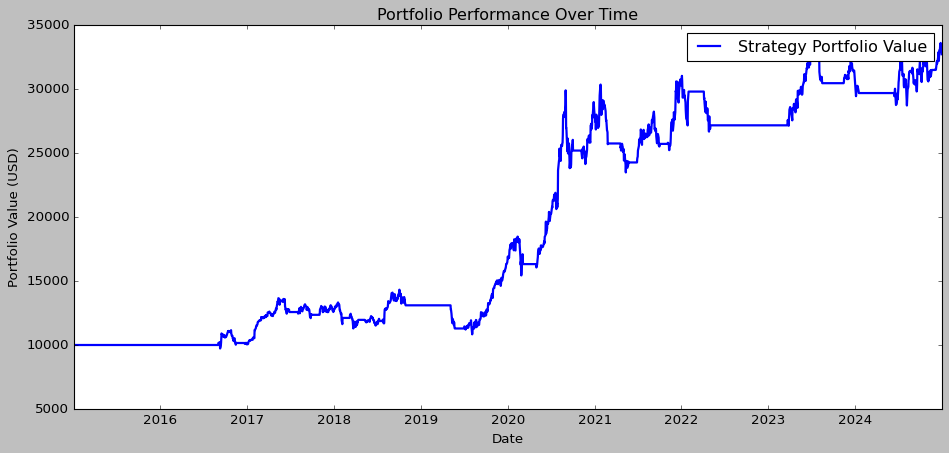

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Portfolio"], label="Strategy Portfolio Value", linewidth=2)
plt.title("Portfolio Performance Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.show()
